# User Sentiment Analysis Notebook

This notebook explores user sentiment in reviews using data analysis techniques. It utilizes various Python libraries for data manipulation, visualization, and sentiment analysis.

## Importing Required Libraries

To begin, we import the necessary libraries:



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


# Loading Data from CSV

In this notebook, we will be working with a dataset stored in a CSV file. We will use the `pandas` library to load the data into a DataFrame.

In [4]:
data=pd.read_csv(r'Data/bumbledata.csv')

In [5]:
data.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,fdeb536c-5dea-4897-b389-5b7009bc1f6c,micheal germain,https://play-lh.googleusercontent.com/a/AGNmyx...,love this app. have used it before and It just...,5,0,5.311.1,2023-03-19 00:52:53,NaN,NaN
1,6e7ba334-cbbb-4fd4-a56f-f6113bfca588,H C,https://play-lh.googleusercontent.com/a/AGNmyx...,Account active status would be nice,3,0,5.311.1,2023-03-18 23:45:56,"Hi there. We know you're probably busy, so we ...",2023-03-19 15:08:41
2,c9837822-0390-46ec-85ba-93fe0735f210,Nadir İlter,https://play-lh.googleusercontent.com/a/AGNmyx...,Works!,5,0,NaN,2023-03-18 23:13:44,NaN,NaN
3,dba8ddcc-5f03-416c-bdfd-a12994b99d4d,vahid mir,https://play-lh.googleusercontent.com/a/AGNmyx...,good,5,0,5.311.1,2023-03-18 23:04:17,NaN,NaN
4,161ae879-30e3-46e4-8d81-518d6c47b556,Merujan Danderian,https://play-lh.googleusercontent.com/a/AGNmyx...,Beware. You sign up for 1 week and it auto ren...,1,0,5.308.1,2023-03-18 23:04:04,Hi there. We're sorry you didn't enjoy your ex...,2023-03-19 15:08:40


# Renaming and Dropping Columns in DataFrame

In this notebook, we will be renaming and dropping columns in a DataFrame using the `rename()` and `drop()` functions from the `pandas` library.



In [23]:
new_column_names = {
    'reviewId': 'NewReviewId',
    'userName': 'NewUserName',
    'userImage': 'NewUserImage',
    'content': 'NewContent',
    'score': 'NewScore',
    'thumbsUpCount': 'NewThumbsUpCount',
    'reviewCreatedVersion': 'NewReviewCreatedVersion',
        'at': 'NewAt',
        'replyContent': 'NewReplyContent',
    'repliedAt': 'NewRepliedAt'
}

data = data.rename(columns=new_column_names)

columns_to_drop = ['NewUserImage', 'NewAt', 'NewReplyContent', 'NewRepliedAt', 'NewReviewId','NewThumbsUpCount']

data = data.drop(columns=columns_to_drop)


In [6]:
data.head(5)

,NewUserName,NewContent,NewScore,NewReviewCreatedVersion
0,micheal germain,love this app. have used it before and It just...,5,5.311.1
1,H C,Account active status would be nice,3,5.311.1
2,Nadir İlter,Works!,5,NaN
3,vahid mir,good,5,5.311.1
4,Merujan Danderian,Beware. You sign up for 1 week and it auto ren...,1,5.308.1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127114 entries, 0 to 127113
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   NewUserName              127114 non-null  object
 1   NewContent               127105 non-null  object
 2   NewScore                 127114 non-null  int64 
 3   NewReviewCreatedVersion  106165 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.9+ MB


# Sentiment Analysis on User Reviews

In this notebook, we will perform sentiment analysis on user reviews using the `nltk` library and the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon.


In [9]:

# Download necessary NLTK resources (run this once)
nltk.download('vader_lexicon')

# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Replace NaN or non-string values in the 'NewContent' column with an empty string
data['NewContent'] = data['NewContent'].fillna('').astype(str)

# Apply sentiment analysis to each user review
data['Sentiment'] = data['NewContent'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify the sentiment into positive, negative, or neutral based on the compound score
data['Sentiment_Classification'] = data['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nimish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
data.head(5)

,NewUserName,NewContent,NewScore,NewReviewCreatedVersion,Sentiment,Sentiment_Classification
0,micheal germain,love this app. have used it before and It just...,5,5.311.1,0.7964,Positive
1,H C,Account active status would be nice,3,5.311.1,0.6705,Positive
2,Nadir İlter,Works!,5,NaN,0.0000,Neutral
3,vahid mir,good,5,5.311.1,0.4404,Positive
4,Merujan Danderian,Beware. You sign up for 1 week and it auto ren...,1,5.308.1,0.0000,Neutral


# Exploratory Data Analysis and Visualization

In this section, we will explore the sentiment classification and review scores in the user review data and visualize them using various plots and charts.

## Distribution of Sentiment Classification


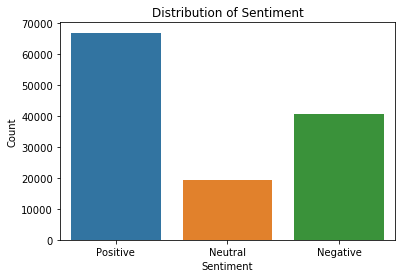

In [11]:
# Create a countplot of sentiment classification
sns.countplot(x='Sentiment_Classification', data=data)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')

# Show the plot
plt.show()


# Distribution of Review Scores

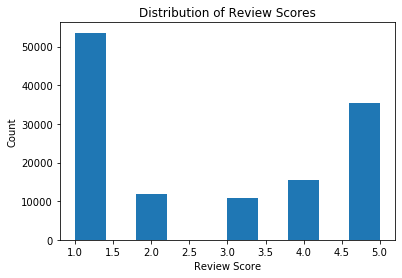

In [14]:

# Plot a histogram of review scores
plt.hist(data['NewScore'], bins=10)

# Add labels and title
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.title('Distribution of Review Scores')

# Show the plot
plt.show()


# Average Score by Sentiment Classification

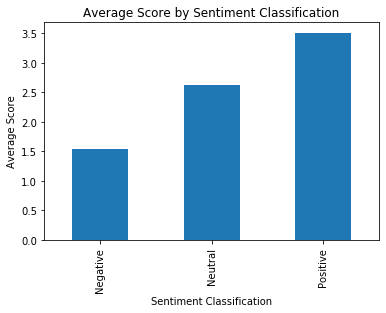

In [16]:
# Calculate the average score for each sentiment classification
average_score = data.groupby('Sentiment_Classification')['NewScore'].mean()

# Plot a bar plot of average scores by sentiment
average_score.plot(kind='bar')

# Add labels and title
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Score')
plt.title('Average Score by Sentiment Classification')

# Show the plot
plt.show()


# Distribution of Review Scores by Sentiment Classification
To compare the distribution of review scores for positive and negative sentiment classifications, we can plot overlapping histograms:


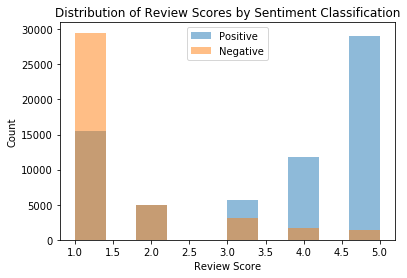

In [17]:
# Plot a histogram of review scores
plt.hist(data[data['Sentiment_Classification'] == 'Positive']['NewScore'], bins=10, label='Positive', alpha=0.5)
plt.hist(data[data['Sentiment_Classification'] == 'Negative']['NewScore'], bins=10, label='Negative', alpha=0.5)

# Add labels and title
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.title('Distribution of Review Scores by Sentiment Classification')

# Add a legend
plt.legend()

# Show the plot
plt.show()


# Percentage of Each Sentiment Classification
Lastly, let's calculate the count and percentage of each sentiment classification and display the results:

In [15]:
# Calculate the count and percentage of each sentiment classification
sentiment_counts = data['Sentiment_Classification'].value_counts()
sentiment_percentages = (sentiment_counts / len(data)) * 100

# Display the count and percentage of each sentiment classification
print(sentiment_counts)
print(sentiment_percentages)


Positive    66940
Negative    40688
Neutral     19486
Name: Sentiment_Classification, dtype: int64
Positive    52.661391
Negative    32.009063
Neutral     15.329547
Name: Sentiment_Classification, dtype: float64


### Based on the analysis of the sentiment classification in the user review data, the following observations can be made:

1. Sentiment Classification Distribution: The majority of user reviews are classified as positive (66,940 reviews), followed by negative (40,688 reviews) and neutral (19,486 reviews). Positive reviews constitute approximately 52.66% of the total reviews, while negative reviews account for around 32.01%, and neutral reviews make up approximately 15.33%.

This distribution indicates that the sentiment of the majority of user reviews is positive, with a significant proportion of reviews expressing negative sentiments and a smaller percentage classified as neutral.

These findings suggest that there is generally a positive sentiment among users, but negative and neutral opinions are also present. It is important for businesses to pay attention to negative reviews and address any issues raised to improve customer satisfaction.

The distribution of sentiment classifications provides insights into the overall sentiment trends and can help businesses understand the sentiment of their customers, identify areas for improvement, and make informed decisions to enhance their products or services.